In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("fhv_data_fixed.csv", index_col=[0])
df.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,...,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pu_zone,pu_borough,do_zone,do_borough,rideshare_company
0,2020-02-10 16:23:50,2020-02-10 16:25:54,2020-02-10 16:27:59,2020-02-10 16:48:32,2.52,1233,4.96,0.00,0.19,0.58,...,N,N,,N,N,Hudson Sq,Manhattan,Murray Hill,Manhattan,Uber
1,2020-02-16 23:01:13,2020-02-16 23:09:07,2020-02-16 23:11:35,2020-02-16 23:17:25,1.52,350,5.04,0.00,0.13,0.45,...,Y,Y,,N,N,Heartland Village/Todt Hill,Staten Island,South Beach/Dongan Hills,Staten Island,Uber
2,2020-03-01 23:32:52,2020-03-01 23:34:55,2020-03-01 23:36:12,2020-03-01 23:38:31,0.45,139,7.19,0.00,0.18,0.64,...,N,N,,N,N,Times Sq/Theatre District,Manhattan,Clinton East,Manhattan,Uber
3,2020-05-20 18:35:47,2020-05-20 18:36:48,2020-05-20 18:38:30,2020-05-20 18:43:52,0.79,322,7.33,0.00,0.18,0.65,...,N,N,,N,N,Canarsie,Brooklyn,Canarsie,Brooklyn,Uber
4,2020-05-19 00:33:48,2020-05-19 00:38:07,2020-05-19 00:39:52,2020-05-19 01:17:14,29.96,2242,50.70,12.24,1.57,5.59,...,N,N,,N,N,Jamaica Estates,Queens,Jamaica Estates,Queens,Uber


In [4]:
# Convert objects to datetimes
df["request_datetime"] = pd.to_datetime(df["request_datetime"], format="mixed", errors="coerce")
df["on_scene_datetime"] = pd.to_datetime(df["on_scene_datetime"], format="mixed", errors="coerce")
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", errors="coerce")
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"], format="mixed", errors="coerce")

In [5]:
# Describe valid columns
df.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,16082929,16082929,16082929,16082929,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00,16082929.00
mean,2023-03-06 07:31:35.404334592,2023-03-06 07:35:18.128871168,2023-03-06 07:36:18.520017152,2023-03-06 07:55:04.995742720,4.52,1126.57,23.07,0.73,0.68,2.06,1.12,0.18,0.96,18.36
min,2020-02-10 16:23:50,2020-02-10 16:25:54,2020-02-10 16:27:59,2020-02-10 16:48:32,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,2022-03-18 15:12:13,2022-03-18 15:18:13,2022-03-18 15:19:16,2022-03-18 15:43:09,1.55,581.00,11.62,0.00,0.33,1.03,0.00,0.00,0.00,9.00
50%,2023-03-05 13:29:51,2023-03-05 13:33:56,2023-03-05 13:34:43,2023-03-05 13:53:56,2.86,927.00,18.18,0.00,0.52,1.60,0.00,0.00,0.00,14.51
75%,2024-02-24 16:56:25,2024-02-24 16:59:15,2024-02-24 17:00:13,2024-02-24 17:22:08,5.82,1451.00,28.74,0.00,0.84,2.57,2.75,0.00,0.00,23.44
max,2025-01-31 23:57:31,2025-01-31 23:59:14,2025-01-31 23:59:43,2025-02-01 00:51:17,523.86,40642.00,2503.71,112.43,75.69,223.92,5.50,7.50,500.00,1803.49
std,NaN,NaN,NaN,NaN,4.48,776.91,16.90,2.73,0.53,1.56,1.35,0.66,2.73,13.23


## Analysis of Passenger Base Fare and Driver Pay

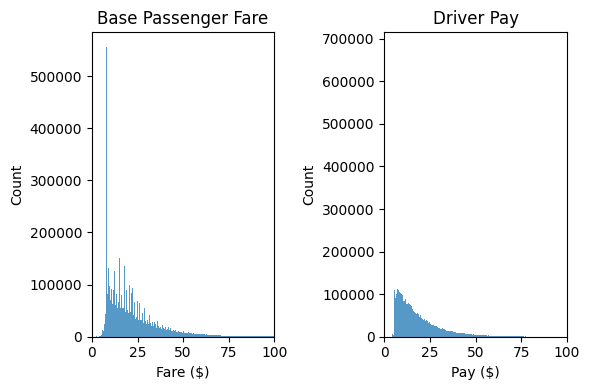

In [6]:
# 1a. Plot the distribution of the base passenger fare and driver pay (limit to amounts less than $100)
fig, axs = plt.subplots(ncols=2, figsize=(6, 4))

sns.histplot(data=df, x="base_passenger_fare", ax=axs[0])
axs[0].set_xlim(0, 100)
axs[0].set_title("Base Passenger Fare")
axs[0].set_xlabel("Fare ($)")

sns.histplot(data=df, x="driver_pay", ax=axs[1])
axs[1].set_xlim(0, 100)
axs[1].set_title("Driver Pay")
axs[1].set_xlabel("Pay ($)")

fig.tight_layout()

### Notes

- The distribution of base passenger fare and driver pay are similar in shape.
- The base passenger fares and driver pays are less than $25 (not including tolls, taxes, and additional fees).
- Most of the trips are within the NYC region because the fares are low.

In [7]:
# Create a column putting fare and pay value in a bucket
bins = [0, 4.99, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 44.99, float('inf')]
labels = ["0-4.99", "5-9.99", "10-14.99", "15-19.99", "20-24.99", "25-29.99", "30-34.99", "35-39.99", "40-44.99", "45+"]

# Bins
df["fare_bin"] = pd.cut(df["base_passenger_fare"], bins=bins, labels=labels)
df["pay_bin"] = pd.cut(df["driver_pay"], bins=bins, labels=labels)

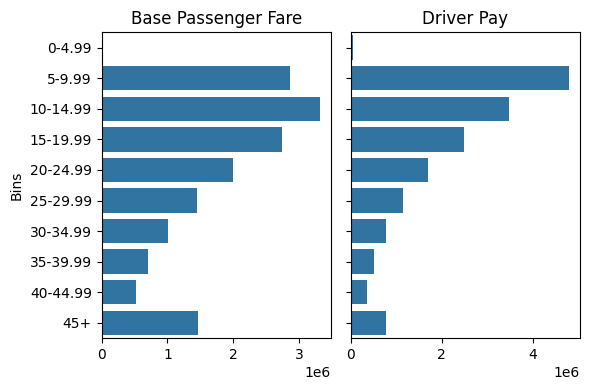

In [8]:
# 1b. Plot the bins of base passenger fare and driver pay amounts
fig, axs = plt.subplots(ncols=2, figsize=(6, 4), sharey=True)

fare_bins = df["fare_bin"]
pay_bins = df["pay_bin"]

sns.barplot(fare_bins.value_counts(), ax=axs[0], orient="h")
axs[0].set_title("Base Passenger Fare")
axs[0].set_xlabel("")
axs[0].set_ylabel("Bins")

sns.barplot(pay_bins.value_counts(), ax=axs[1], orient="h")
axs[1].set_title("Driver Pay")
axs[1].set_xlabel("")

fig.tight_layout()

### Notes

- Again, the majority of the base passenger fare and driver pay is below $25.
- The passengers are paying more per trip, and the driver is paid less.

In [9]:
# 1c. The average driver pay by pick up and drop off borough then sorted from dense trip totals and driver pay
df.groupby(["pu_borough", "do_borough"])[["driver_pay"]].agg(["count", np.mean])\
    .sort_values(by=[("driver_pay", "count"), ("driver_pay", "mean")], ascending=[False, False])

driver_pay      
                                 count  mean
pu_borough    do_borough                    
Manhattan     Manhattan        4862113 15.22
Brooklyn      Brooklyn         3230683 13.32
Queens        Queens           2108073 13.63
Bronx         Bronx            1544822 12.24
Manhattan     Queens            610661 37.13
              Brooklyn          563493 27.83
Brooklyn      Manhattan         513495 28.09
Queens        Manhattan         509467 36.45
Brooklyn      Queens            446943 28.62
Queens        Brooklyn          404571 28.26
Manhattan     Bronx             362019 22.22
Bronx         Manhattan         352525 22.42
Staten Island Staten Island     193980 12.55
Manhattan     EWR                92184 53.18
Bronx         Queens             77629 33.96
Queens        Bronx              72445 34.50
Brooklyn      Bronx              30412 48.81
Bronx         Brooklyn           28587 48.62
Staten Island Brooklyn           17339 34.07
Brooklyn      Staten Island      17174 34.00
              EWR                12472 59.00
Manhattan     Staten Island       9432 53.08
Staten Island Manhattan           6818 55.23
Queens        EWR                 3673 75.93
Staten Island Queens              3099 65.64
              EWR                 3090 38.87
Queens        Staten Island       3069 64.21
Bronx         EWR                 1450 68.99
Staten Island Bronx                614 77.24
Bronx         Staten Island        597 74.91

### Notes

- Most of the trips are within the boroughs, and the highest average pay for drivers is Manhattan followed by Queens.
- Manhattan to Queens is a popular pick-up to drop-off route with a average pay above $35.
- The Bronx has the lowest average pay ($12.24) to drivers.
- Staten Island is not a popular pick up spot, however, the average driver pay to travel to other boroughs is normally high.

In [10]:
# 1d. The top 5 popular drop off locations with the total number of trips and the average driver pay
df.groupby(["pu_borough", "do_borough", "do_zone"])["driver_pay"]\
  .agg(count='count', mean='mean')\
  .groupby(level=0, group_keys=False)\
  .apply(lambda g: g.sort_values(by=["count", "mean"], ascending=[False, False]).head(5))

count  mean
pu_borough    do_borough    do_zone                                       
Bronx         Bronx         Soundview/Castle Hill              64813 12.32
                            Bedford Park                       61117 11.75
                            Mott Haven/Port Morris             59529 13.72
                            Mount Hope                         58945 11.82
                            East Concourse/Concourse Village   58817 12.64
Brooklyn      Brooklyn      Crown Heights North               181019 12.83
                            East New York                     142765 12.70
                            Bushwick South                    121629 13.45
                            Flatbush/Ditmas Park              114463 13.70
                            Prospect-Lefferts Gardens         108959 13.19
Manhattan     Queens        LaGuardia Airport                 188101 34.26
              Manhattan     Midtown Center                    165283 15.88
                            East Village                      157093 14.32
                            West Chelsea/Hudson Yards         152170 15.13
                            Times Sq/Theatre District         151494 16.27
Queens        Queens        JFK Airport                       105603 21.56
                            Astoria                           101290 12.08
                            Jamaica                           101069 12.59
                            Jackson Heights                    91908 11.84
                            Elmhurst                           91527 12.09
Staten Island Staten Island Saint George/New Brighton          30247 11.87
                            Bloomfield/Emerson Hill            22696 13.62
                            Heartland Village/Todt Hill        15204 13.52
                            Mariners Harbor                    14950 11.87
                            Stapleton                          14650 11.79

### Notes

- Queens is a popular drop-off location for airport passengers such as LaGuardia (188101 trips) followed by JFK (105603 trips) airport.
- The average driver pay is higher in Manhattan.
- Manhattan and then Brooklyn are the popular drop-off boroughs in NYC, meaning people generally travel to these places.